In [79]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import copy
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import math
import pandas as pd

# Algoritmos de Optimización


## Colonia Artificial de Abejas multiobjetivo (MOABC)

In [143]:
def dominanciaPareto(objs1,objs2,case="minimo"):
  # selector de direccion 
  if case == "minimo":
    funcion = lambda obNew,obOld : obNew < obOld
  elif case == "maximo":
    funcion = lambda obNew,obOld :  obNew > obOld
  else:
    funcion = lambda obNew,obOld :  obNew < obOld
  dominance=False
  for index,ob1 in enumerate(objs1):
    if funcion(ob1,objs2[index]):
      dominance = True
    elif funcion(objs2[index],ob1):
      return False
  return dominance

In [144]:
def dominanciaParetoPobla(objs,soluciones):
  pareto = list()
  solucion=list()
  for  index, objBase in enumerate(objs):
    flag=True
    for population,objcompare in enumerate(objs):
      if dominanciaPareto(objcompare,objBase):
        flag=False
        break 
    if flag:
      pareto.append(copy.deepcopy(objBase))
      solucion.append(copy.deepcopy(soluciones[index]))
  return pareto,solucion 

In [192]:
def abc(fobj, bounds, its=1000, foodsource=100, maxim=False, limitBee=5):
    #Init
    dimensions = len(bounds)
    min_b, max_b = np.asarray(bounds).T
    popsize=int(foodsource/dimensions)
    limit=(popsize*dimensions)
    trial=np.zeros((int(popsize), 1), dtype='f')
    probs=np.zeros((int(popsize), 1), dtype='f')    
    foodS=np.random.uniform(low=min_b, high=max_b, size=(popsize,dimensions))
    fx=np.asarray([fobj(i) for i in foodS])    
    BestFoodP, BestFood=dominanciaParetoPobla(fx, foodS)
    HistoricFood=list()
    HistoricFunction=list()
    for it in range(its):
        #ABEJAS EMPLEADAS
        count=0       
        for i in foodS:
            a=np.random.randint(0, dimensions)
            b=np.random.randint(0, len(foodS))                        
            par=copy.deepcopy(foodS[b,a])                
            while(par==i[a]):
                b=np.random.randint(0, len(foodS))
                par=copy.deepcopy(foodS[b,a]) 
            xNew=(i[a])+(np.random.uniform(low=-1, high=1)) *(i[a]-par)
            if(xNew<min_b[a]):
                xNew=min_b[a]
            elif(xNew>max_b[a]):
                xNew=max_b[a]
            foodT=copy.deepcopy(foodS[count])
            foodT[a]=xNew
            newFun=fobj(foodT)           
            if dominanciaPareto(newFun, fx[count]):
                foodS[count,a]=xNew
                fx[count]=newFun                
                trial[count]=0
            else:
                trial[count]+=1                            
            count+=1
        #ABEJAS ESPECTADORAS

        BestFoodParPr, BestFoodPr=dominanciaParetoPobla(fx, foodS)
        count=0
        fitPr=list()
        for i in fx:
            domI=0
            suma=0
            for j in fx:
                if(dominanciaPareto(i, j)):
                    suma+=1
            fitPr.append(suma/popsize)
        probs=list()
        pSuma=np.asarray(fitPr).sum()       
        for i in fitPr:
            probs.append(i/pSuma)
        for i in foodS:
            if (np.random.uniform(low=0, high=1)<probs[count]):
                par=foodS[b,a]                
                while(par==i[a]):
                    b=np.random.randint(0, len(foodS))
                    par=foodS[b,a]
                xNew=(i[a])+(np.random.uniform(low=-1, high=1)) *(i[a]-par)
                if(xNew<min_b[a]):
                    xNew=min_b[a]
                elif(xNew>max_b[a]):
                    xNew=max_b[a]
                foodT=copy.deepcopy(foodS[count])
                foodT[a]=xNew
                newFun=fobj(foodT)           
                if dominanciaPareto(newFun, fx[count]):
                    foodS[count,a]=xNew
                    fx[count]=newFun                
                    trial[count]=0
                else:
                    trial[count]+=1                            
                count+=1
        #Memoriza
        #ABEJAS EXPLORADORAS
        count=0        
        for i in trial:
            if (i>limitBee):                
                foodN=np.random.uniform(low=min_b, high=max_b, size=(1,dimensions))
                foodS[count]=foodN
                nfun=fobj(foodN[0])                             
                trial[count]=0       
                fx[count]=nfun                
            count+=1

        BestFoodP, BestFood=dominanciaParetoPobla(fx, foodS)
        HistoricFood.append(copy.deepcopy(BestFood))
        HistoricFunction.append(copy.deepcopy(BestFoodP))        
    return HistoricFood, HistoricFunction  

# Funciones de prueba

## Función Schaffer ABC

In [85]:
#Schaffer function N 

#minimize
def Schaffer(parametros):
    x=Symbol('x')
    f1=x**2
    f2=(x-2)**2
    Obj1=f1.subs([[x,parametros[0]]])
    Obj2=f2.subs([[x,parametros[0]]])
    return Obj1,Obj2 

In [198]:
historicFood, historicFx = abc(Schaffer, bounds=[(-100, 100), (-100, 100)], its=100, foodsource=100, limitBee=10, maxim=False) 




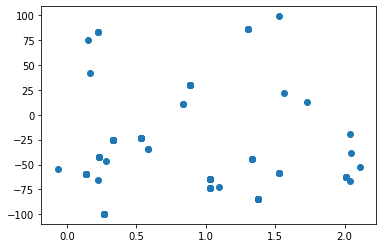

In [210]:
x=[i[0][0] for i in historicFood]
y=[i[0][1] for i in historicFood]

figure = plt.figure()
plt.scatter(x,y)

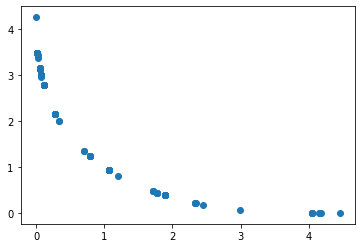

In [211]:
x=[i[0][0] for i in historicFx]
y=[i[0][1] for i in historicFx]

figure = plt.figure()
plt.scatter(x,y)